# WeatherPy
----

### Analysis
##### 1. As expected, the plot of city latitude vesus temperature(F) shows that the weather becomes warmer as one approaches the equator at 0 Degrees Latitude. An interesting oberservation is the southern hemisphere seems to be hotter at this time of year than the notherern hemisphere. There are a few cities at -20 degrees latitude that have readings above 100 degrees F while there are no cities at this time of year in the northern hemisphere showing Max Temperatures above 100 degrees F. Personally, I would need to live in a city between -35 and 35 latitude since I don't like to be cold!

##### 2. There does not seem to be a strong relationship between latitude and cloudiness nor a correlation between latitude and humidity. It is important to note cities at all latitudes tended toward having a higher humidty at this time of year with a significant number of cities having humities above 80%. City cloudiness showed a strong line of cities having 0% cloudiness and a strong line of cities having 100% cloudiness.

##### 3. When plotting latitude against wind speeds, there was little relationship that could be found. Most the the cities show beign wind speeds at this time of year. There were however, the cities towards the north and south pole showed higher wind speeds than at the equator. At this time there are not enough data points at the two extreme pole to see if this is indeed a significant obersavation or an outlier.  
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from datetime import datetime
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities_df = pd.DataFrame({"City":cities}).reset_index()
cities_df.count()

index    629
City     629
dtype: int64

In [3]:
#set up additional columns to hold weather information
cities_df['Country'] = ''
cities_df['Date'] = ''
cities_df['Latitude'] = ''
cities_df['Longitude'] = ''
cities_df['Temperature(F)'] = ''
cities_df['Humidity(%)'] = ''
cities_df['Cloudiness(%)'] = ''
cities_df['WindSpeed(mph)'] = ''
cities_df.head()

,index,City,Country,Date,Latitude,Longitude,Temperature(F),Humidity(%),Cloudiness(%),WindSpeed(mph)
0,0,half moon bay,,,,,,,,
1,1,atuona,,,,,,,,
2,2,taolanaro,,,,,,,,
3,3,fairlie,,,,,,,,
4,4,faanui,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


print(query_url)
print(query_url + city)

http://api.openweathermap.org/data/2.5/weather?appid=71435179e8b51b15e0a016f1ab88894e&units=imperial&q=
http://api.openweathermap.org/data/2.5/weather?appid=71435179e8b51b15e0a016f1ab88894e&units=imperial&q=vaini


In [7]:
#Add a two second interval between queries to stay within API query limits
time.sleep(3)
response_json = []
print("Begin Retrieving Weather Data")

print("-------------------------------")
for index, row in cities_df.iterrows():
    
    #get city name form df
    city_name = row['City']
    
    city_url = query_url + city_name.replace(" ","+")
    #assemble url and make API request
    print(f"Retrieving Weather Data Results for City {index}: {city_name}.")
    response = requests.get(city_url).json()
    if response['cod'] == "404":
        print("No City Info found, skipping...")
    else:
        print(f"Weather Data for {city_name} added to results")
        
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Latitude'] = response['coord']['lat']
        cities_df.loc[index, 'Longitude'] = response['coord']['lon']
        cities_df.loc[index, 'Temperature(F)'] = response['main']['temp']
        cities_df.loc[index, 'Humidity(%)'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness(%)'] = response['clouds']['all']
        cities_df.loc[index, 'WindSpeed(mph)'] = response['wind']['speed']
        
    print("---------------------------------")
    

Begin Retrieving Weather Data
-------------------------------
Retrieving Weather Data Results for City 0: half moon bay.
Weather Data for half moon bay added to results
---------------------------------
Retrieving Weather Data Results for City 1: atuona.
Weather Data for atuona added to results
---------------------------------
Retrieving Weather Data Results for City 2: taolanaro.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 3: fairlie.
Weather Data for fairlie added to results
---------------------------------
Retrieving Weather Data Results for City 4: faanui.
Weather Data for faanui added to results
---------------------------------
Retrieving Weather Data Results for City 5: acapulco.
Weather Data for acapulco added to results
---------------------------------
Retrieving Weather Data Results for City 6: bethel.
Weather Data for bethel added to results
---------------------------------
Retrieving Weather Data Results for

Weather Data for muisne added to results
---------------------------------
Retrieving Weather Data Results for City 63: busselton.
Weather Data for busselton added to results
---------------------------------
Retrieving Weather Data Results for City 64: port alfred.
Weather Data for port alfred added to results
---------------------------------
Retrieving Weather Data Results for City 65: lasa.
Weather Data for lasa added to results
---------------------------------
Retrieving Weather Data Results for City 66: saint-philippe.
Weather Data for saint-philippe added to results
---------------------------------
Retrieving Weather Data Results for City 67: qaanaaq.
Weather Data for qaanaaq added to results
---------------------------------
Retrieving Weather Data Results for City 68: tasiilaq.
Weather Data for tasiilaq added to results
---------------------------------
Retrieving Weather Data Results for City 69: cabo san lucas.
Weather Data for cabo san lucas added to results
-------------

No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 125: georgetown.
Weather Data for georgetown added to results
---------------------------------
Retrieving Weather Data Results for City 126: valparaiso.
Weather Data for valparaiso added to results
---------------------------------
Retrieving Weather Data Results for City 127: sentyabrskiy.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 128: inirida.
Weather Data for inirida added to results
---------------------------------
Retrieving Weather Data Results for City 129: saint-georges.
Weather Data for saint-georges added to results
---------------------------------
Retrieving Weather Data Results for City 130: ostrovnoy.
Weather Data for ostrovnoy added to results
---------------------------------
Retrieving Weather Data Results for City 131: san luis.
Weather Data for san luis added to results
--------------------------

No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 188: medea.
Weather Data for medea added to results
---------------------------------
Retrieving Weather Data Results for City 189: saryshagan.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 190: yumen.
Weather Data for yumen added to results
---------------------------------
Retrieving Weather Data Results for City 191: bengkulu.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 192: muzhi.
Weather Data for muzhi added to results
---------------------------------
Retrieving Weather Data Results for City 193: mundargi.
Weather Data for mundargi added to results
---------------------------------
Retrieving Weather Data Results for City 194: barentsburg.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 195: sai

Weather Data for jaisinghnagar added to results
---------------------------------
Retrieving Weather Data Results for City 251: champerico.
Weather Data for champerico added to results
---------------------------------
Retrieving Weather Data Results for City 252: nendaz.
Weather Data for nendaz added to results
---------------------------------
Retrieving Weather Data Results for City 253: eureka.
Weather Data for eureka added to results
---------------------------------
Retrieving Weather Data Results for City 254: barao de melgaco.
Weather Data for barao de melgaco added to results
---------------------------------
Retrieving Weather Data Results for City 255: patamundai.
Weather Data for patamundai added to results
---------------------------------
Retrieving Weather Data Results for City 256: vestmannaeyjar.
Weather Data for vestmannaeyjar added to results
---------------------------------
Retrieving Weather Data Results for City 257: zyryanskoye.
Weather Data for zyryanskoye adde

Weather Data for xai-xai added to results
---------------------------------
Retrieving Weather Data Results for City 314: yatou.
Weather Data for yatou added to results
---------------------------------
Retrieving Weather Data Results for City 315: jackson.
Weather Data for jackson added to results
---------------------------------
Retrieving Weather Data Results for City 316: broome.
Weather Data for broome added to results
---------------------------------
Retrieving Weather Data Results for City 317: sabang.
Weather Data for sabang added to results
---------------------------------
Retrieving Weather Data Results for City 318: pevek.
Weather Data for pevek added to results
---------------------------------
Retrieving Weather Data Results for City 319: tsabong.
Weather Data for tsabong added to results
---------------------------------
Retrieving Weather Data Results for City 320: zhigansk.
Weather Data for zhigansk added to results
---------------------------------
Retrieving Weathe

Weather Data for gualaquiza added to results
---------------------------------
Retrieving Weather Data Results for City 377: manicore.
Weather Data for manicore added to results
---------------------------------
Retrieving Weather Data Results for City 378: anqing.
Weather Data for anqing added to results
---------------------------------
Retrieving Weather Data Results for City 379: zemio.
Weather Data for zemio added to results
---------------------------------
Retrieving Weather Data Results for City 380: pedasi.
Weather Data for pedasi added to results
---------------------------------
Retrieving Weather Data Results for City 381: cockburn town.
Weather Data for cockburn town added to results
---------------------------------
Retrieving Weather Data Results for City 382: scarborough.
Weather Data for scarborough added to results
---------------------------------
Retrieving Weather Data Results for City 383: grand river south east.
No City Info found, skipping...
-------------------

Weather Data for kabin buri added to results
---------------------------------
Retrieving Weather Data Results for City 439: bodden town.
Weather Data for bodden town added to results
---------------------------------
Retrieving Weather Data Results for City 440: guerrero negro.
Weather Data for guerrero negro added to results
---------------------------------
Retrieving Weather Data Results for City 441: tautira.
Weather Data for tautira added to results
---------------------------------
Retrieving Weather Data Results for City 442: yerbogachen.
Weather Data for yerbogachen added to results
---------------------------------
Retrieving Weather Data Results for City 443: rorvik.
Weather Data for rorvik added to results
---------------------------------
Retrieving Weather Data Results for City 444: auki.
Weather Data for auki added to results
---------------------------------
Retrieving Weather Data Results for City 445: lahat.
Weather Data for lahat added to results
--------------------

Weather Data for huntsville added to results
---------------------------------
Retrieving Weather Data Results for City 501: avesta.
Weather Data for avesta added to results
---------------------------------
Retrieving Weather Data Results for City 502: ilulissat.
Weather Data for ilulissat added to results
---------------------------------
Retrieving Weather Data Results for City 503: san nicolas.
Weather Data for san nicolas added to results
---------------------------------
Retrieving Weather Data Results for City 504: hervey bay.
Weather Data for hervey bay added to results
---------------------------------
Retrieving Weather Data Results for City 505: kerema.
Weather Data for kerema added to results
---------------------------------
Retrieving Weather Data Results for City 506: asyut.
Weather Data for asyut added to results
---------------------------------
Retrieving Weather Data Results for City 507: rio tuba.
Weather Data for rio tuba added to results
--------------------------

Weather Data for inhambane added to results
---------------------------------
Retrieving Weather Data Results for City 563: fethiye.
Weather Data for fethiye added to results
---------------------------------
Retrieving Weather Data Results for City 564: malakal.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 565: oltu.
Weather Data for oltu added to results
---------------------------------
Retrieving Weather Data Results for City 566: gijon.
Weather Data for gijon added to results
---------------------------------
Retrieving Weather Data Results for City 567: clonakilty.
Weather Data for clonakilty added to results
---------------------------------
Retrieving Weather Data Results for City 568: roald.
Weather Data for roald added to results
---------------------------------
Retrieving Weather Data Results for City 569: udomlya.
Weather Data for udomlya added to results
---------------------------------
Retrieving Weather Data

Weather Data for dalbandin added to results
---------------------------------
Retrieving Weather Data Results for City 625: svencioneliai.
Weather Data for svencioneliai added to results
---------------------------------
Retrieving Weather Data Results for City 626: moron.
Weather Data for moron added to results
---------------------------------
Retrieving Weather Data Results for City 627: bur gabo.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 628: bangassou.
Weather Data for bangassou added to results
---------------------------------


In [8]:
cities_df.head()

,index,City,Country,Date,Latitude,Longitude,Temperature(F),Humidity(%),Cloudiness(%),WindSpeed(mph)
0,0,half moon bay,US,1547340960,37.46,-122.43,57.87,57,40,9.17
1,1,atuona,PF,1547343917,-9.8,-139.03,80.19,100,68,15.84
2,2,taolanaro,,,,,,,,
3,3,fairlie,US,1547343300,33.31,-95.96,43.25,72,90,12.75
4,4,faanui,PF,1547343606,-16.48,-151.75,82.44,100,92,22.32


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Output File (CSV)
cities_df.to_csv("output_data/cities.csv")

In [19]:
cities_df[["Latitude", "Longitude", "Temperature(F)", "Humidity(%)",
          "Cloudiness(%)", "WindSpeed(mph)"]] = cities_df[["Latitude", "Longitude", "Temperature(F)", "Humidity(%)",
          "Cloudiness(%)", "WindSpeed(mph)"]].apply(pd.to_numeric)

cities_df.dtypes


index               int64
City               object
Country            object
Date               object
Latitude          float64
Longitude         float64
Temperature(F)    float64
Humidity(%)       float64
Cloudiness(%)     float64
WindSpeed(mph)    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

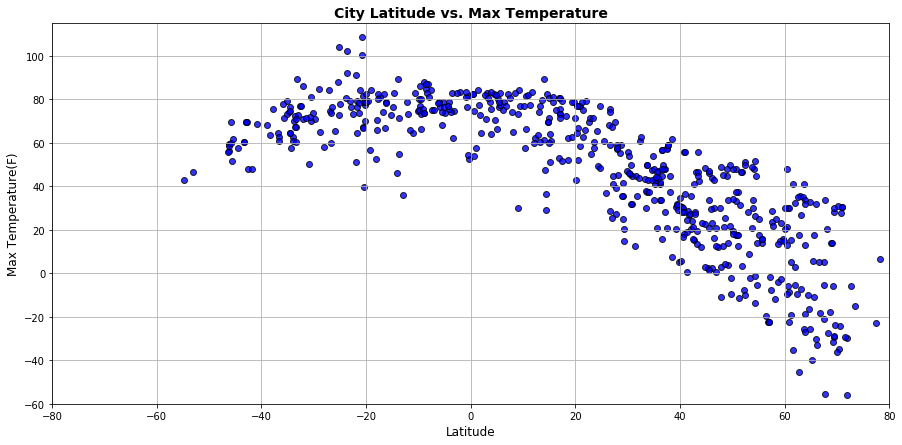

In [31]:
#Build a scatter plot for Latitude vs. Temperature
plt.figure(figsize = (15,7))
plt.scatter(cities_df["Latitude"], cities_df["Temperature(F)"], marker="o",
            facecolors="blue", edgecolor="black", linewidths=1, alpha=0.8, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature", fontsize=14, fontweight="bold")
plt.ylabel("Max Temperature(F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True)
plt.xlim([-80, 80])
plt.ylim([-60, 115])

# Show plot
plt.show()

In [32]:
# Save the figure
plt.savefig("output_data/LatvTemp.png")


<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

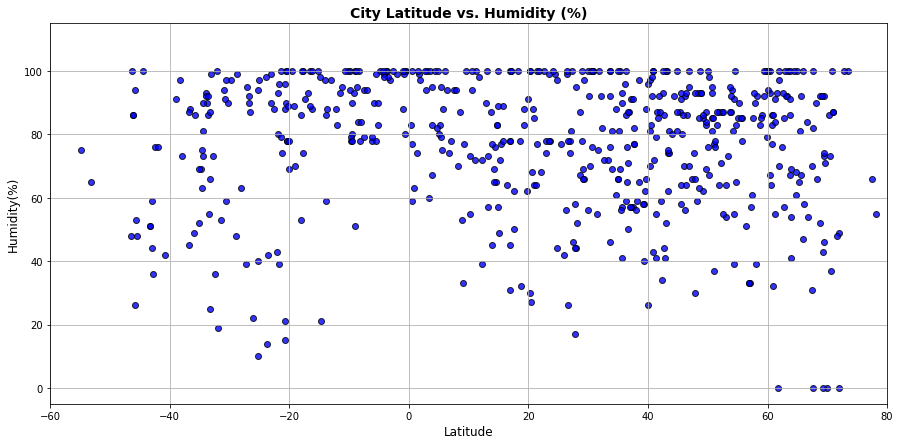

In [37]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.figure(figsize = (15,7))
plt.scatter(cities_df["Latitude"], cities_df["Humidity(%)"], marker="o",
            facecolors="blue", edgecolor="black", linewidths=1, alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%)", fontsize=14, fontweight="bold")
plt.ylabel("Humidity(%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-5, 115])

# Show plot
plt.show()

In [38]:
# Save the figure
plt.savefig("output_data/LatvHumid.png")


<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

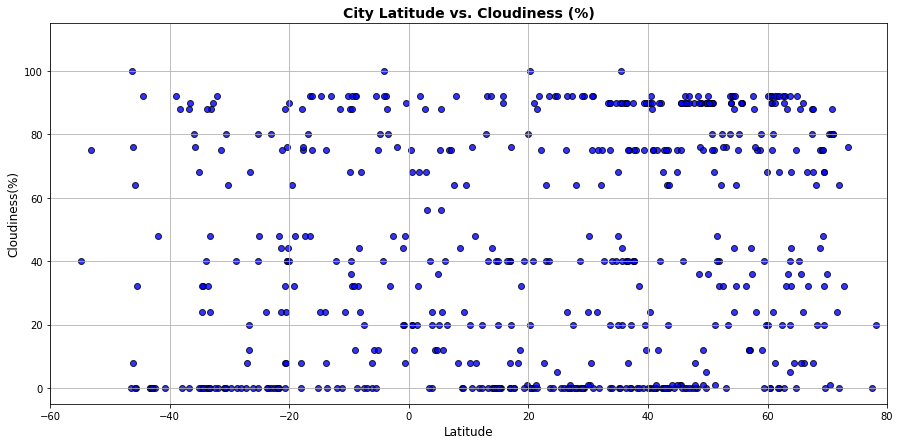

In [43]:
#Build a scatter plot for Latitude vs. Cloudiness (%)
plt.figure(figsize = (15,7))
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness(%)"], marker="o",
            facecolors="blue", edgecolor="black", linewidths=1, alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%)", fontsize=14, fontweight="bold")
plt.ylabel("Cloudiness(%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-5, 115])

# Show plot
plt.show()

In [81]:
# Save the figure
plt.savefig("output_data/LatvCloud.png")


<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

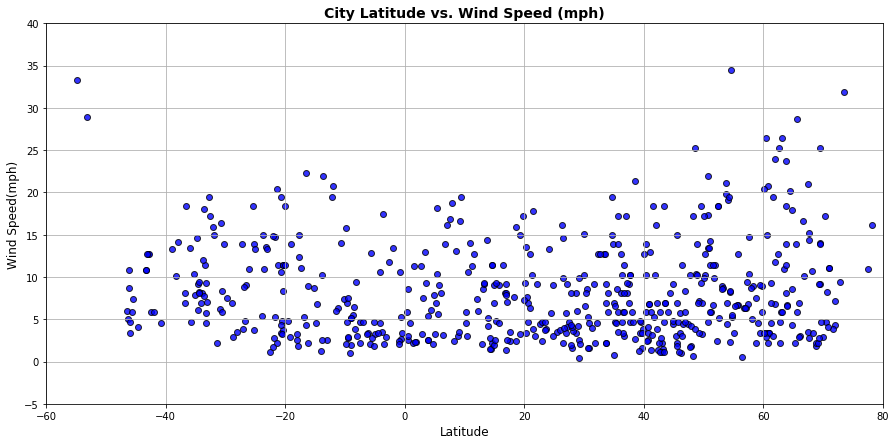

In [85]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)
fig = plt.figure(figsize = (15,7)).set_facecolor('w')

plt.scatter(cities_df["Latitude"], cities_df["WindSpeed(mph)"], marker="o", 
            facecolors="blue", edgecolor="black", linewidths=1, alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph)", fontsize=14, fontweight="bold")
plt.ylabel("Wind Speed(mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-5, 40])

# Show plot
plt.show()

In [80]:
# Save the figure
plt.savefig("output_data/LatvWind.png")

<Figure size 432x288 with 0 Axes>